In [47]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [49]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
sys.path.insert(1, '../libs')
from scatter_hull import ScatterHull

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from scipy.interpolate import interp1d

In [50]:
header = ['volcano', 'cluster']

In [51]:
sh = ScatterHull()
all_volcanoes = sh.get_all_volcanoes()

In [52]:
all_volcanoes

['Aguilera',
 'Antillanca-Casablanca',
 'Apagado',
 'Caburga-Huelemolle',
 'Calbuco',
 'Carrán-Los Venados',
 'Cay',
 'Chaitén',
 'Corcovado',
 'Cordón Cabrera',
 'Hornopirén',
 'Huanquihue Group',
 'Hudson',
 'Huequi',
 'Lanín',
 'Lautaro',
 'Llaima',
 'Macá',
 'Melimoyu',
 'Mentolat',
 'Michinmahuida',
 'Mocho-Choshuenco',
 'Monte Burney',
 'Osorno',
 'Puyehue-Cordón Caulle',
 'Quetrupillán',
 'Reclus',
 'Sollipulli',
 'Subsidiary Vcha dome',
 'Villarrica',
 'Yanteles',
 'Yate']

In [53]:
simbología = pd.read_excel('../data/Simbologia.xlsx')
def get_volcano_color(volcano):    
    Event = simbología.loc[simbología['Volcano'] == volcano]
    color = Event.values[0,2]
    return color

In [54]:
n_clusters = {}
n_clusters['Aguilera'] = 2
n_clusters['Antillanca-Casablanca'] =3
n_clusters['Apagado'] = 2
n_clusters['Caburga-Huelemolle'] = 1
n_clusters['Calbuco'] = 2
n_clusters['Carrán-Los Venados'] = 2
n_clusters['Cay'] = 3
n_clusters['Chaitén'] = 1
n_clusters['Corcovado'] = 0
n_clusters['Cordón Cabrera'] = 0
n_clusters['Hornopirén'] = 3
n_clusters['Huanquihue Group'] = 1
n_clusters['Hudson'] = 1
n_clusters['Huequi'] = 3
n_clusters['Lanín'] = 3
n_clusters['Lautaro'] = 2
n_clusters['Llaima'] = 1
n_clusters['Macá'] = 3 
n_clusters['Melimoyu'] = 3
n_clusters['Mentolat'] = 2
n_clusters['Michinmahuida'] = 1
n_clusters['Mocho-Choshuenco'] = 1
n_clusters['Monte Burney'] = 3
n_clusters['Osorno'] = 2
n_clusters['Puyehue-Cordón Caulle'] = 2
n_clusters['Quetrupillán'] = 2
n_clusters['Reclus'] = 2
n_clusters['Sollipulli'] = 2
n_clusters['Subsidiary Vcha dome'] = 3
n_clusters['Villarrica'] = 3
n_clusters['Yanteles'] = 1
n_clusters['Yate'] = 1

In [55]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [56]:
# to normalize sample points 
clusterLens = []
clusterLensArea = []
for v in all_volcanoes:
    points = sh.get_points_per_volcano(v, 'SiO2','K2O')
    if len(points) < 5:
        clusterLens.append(len(points))
    else:
        # DBSCAN
        clusters = sh.get_clusters_dbscan(points, eps=1, algorithm='auto')
        for c_label, c_points in clusters.items():
            clusterLens.append(len(c_points))
            if len(c_points) > 2:
                hull = ConvexHull(c_points)
                vertexs = []
                for simplex in hull.vertices:
                    vertexs.append([c_points[simplex, 0], c_points[simplex, 1]])

                area = PolyArea(list(list(zip(*vertexs))[0]), list(list(zip(*vertexs))[1]))
                clusterLensArea.append((len(c_points))/area)

m = interp1d([min(clusterLens),max(clusterLens)],[0,1])
mLA = interp1d([min(clusterLensArea),max(clusterLensArea)],[0,1])

N points:  32
0.6255194884852244
0.06783666971756475


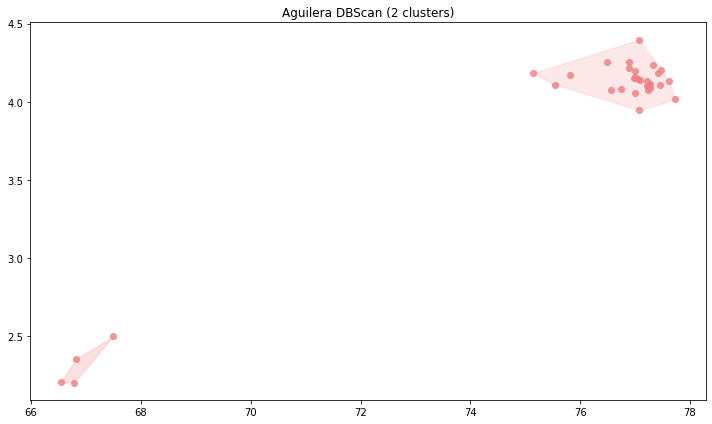

N points:  116
1.413260048062341
1.5677122032376474
0.20809610841737936
0.2863771853702417


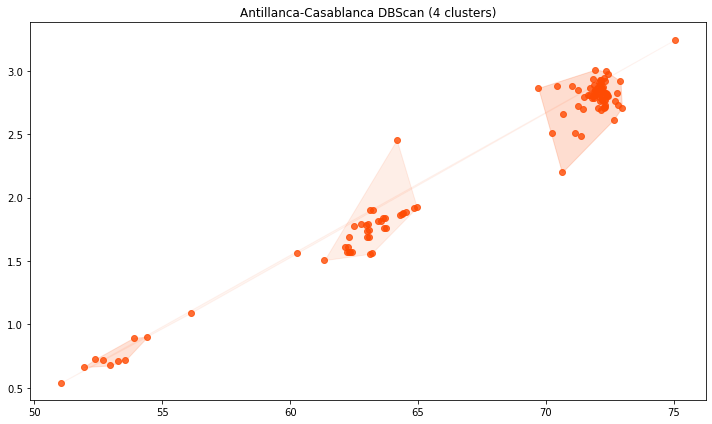

N points:  32
2.19345159306323
0.0727117963475763


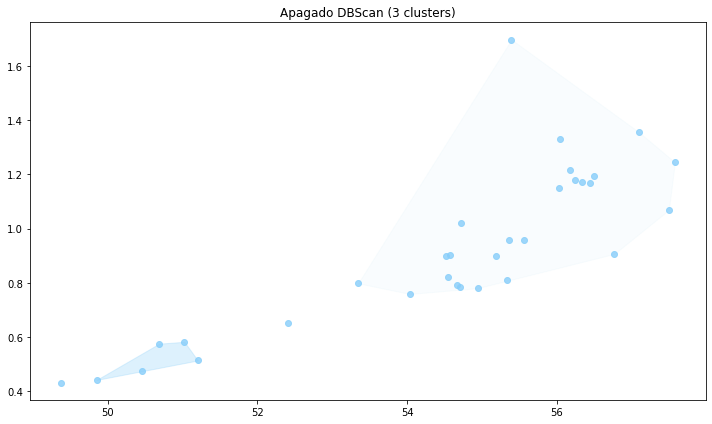

N points:  134
8.702082964457304


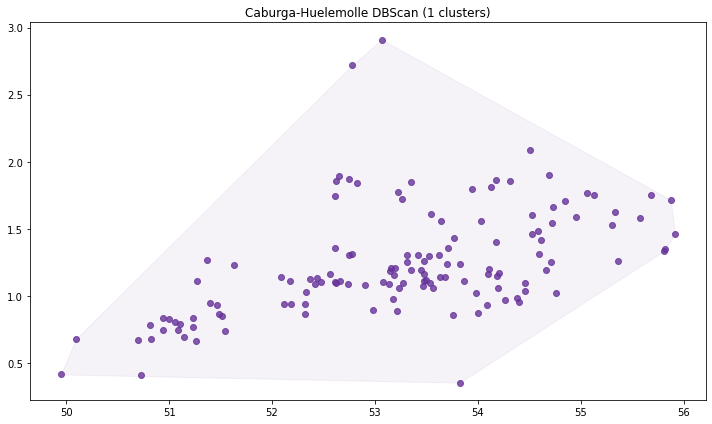

N points:  142
0.2065800326767544
9.602767393378883
6.722886683174465


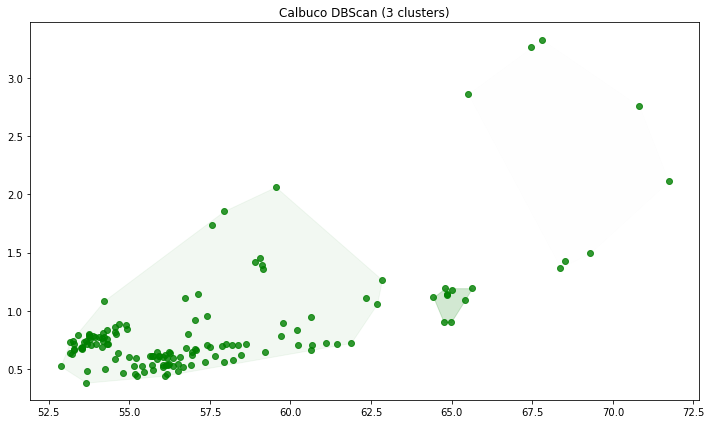

N points:  155
0.4038383576508977
6.319058654159619
0.3031274648120643
1.886599903827431
4.027638311842935
41.03899573437019


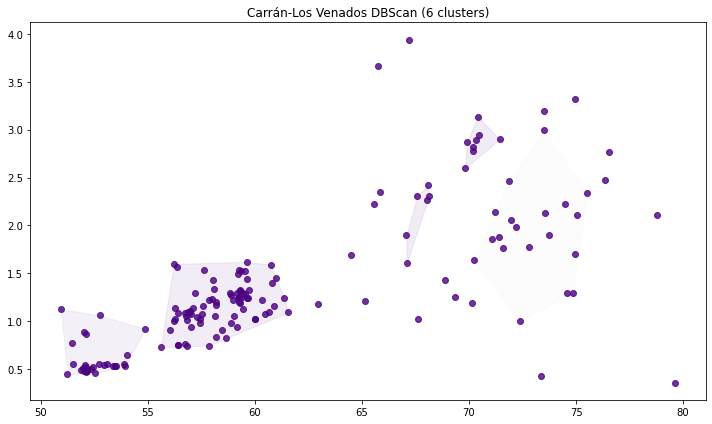

N points:  17
0.16495764627477172
4.175444525775447


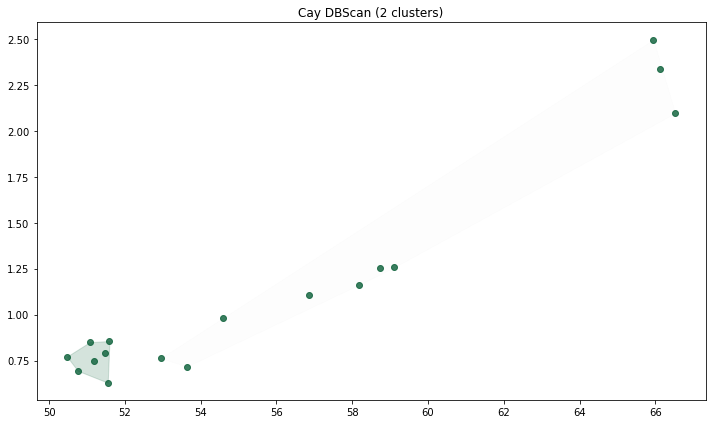

N points:  985
7.31557423839763
0.03845226706363292


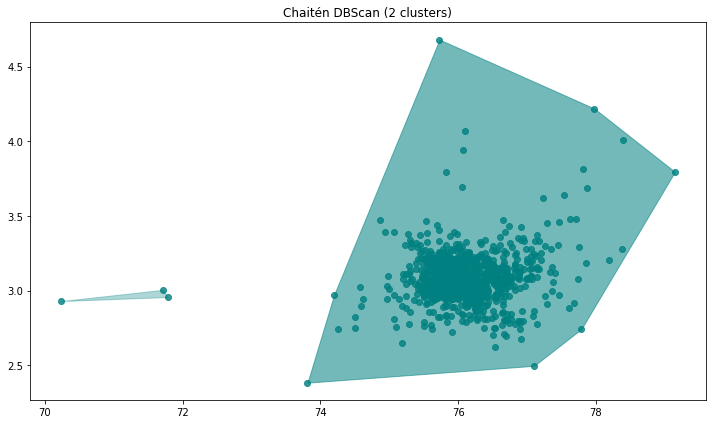

N points:  4


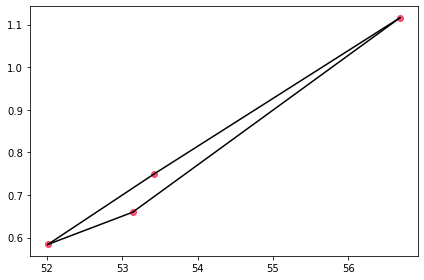

N points:  4


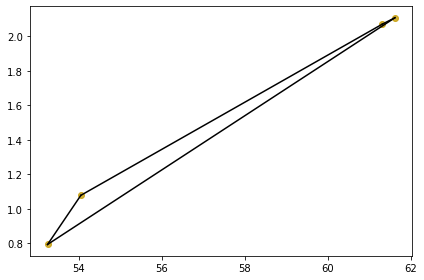

N points:  20
0.7957178560697855


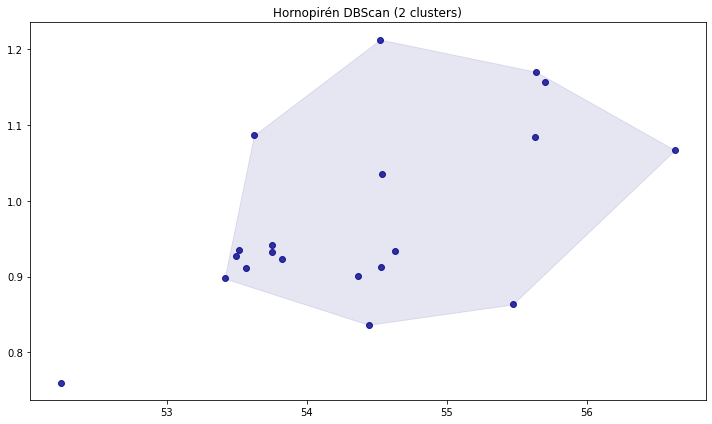

N points:  176
4.339571815358738
0.8046272638505343


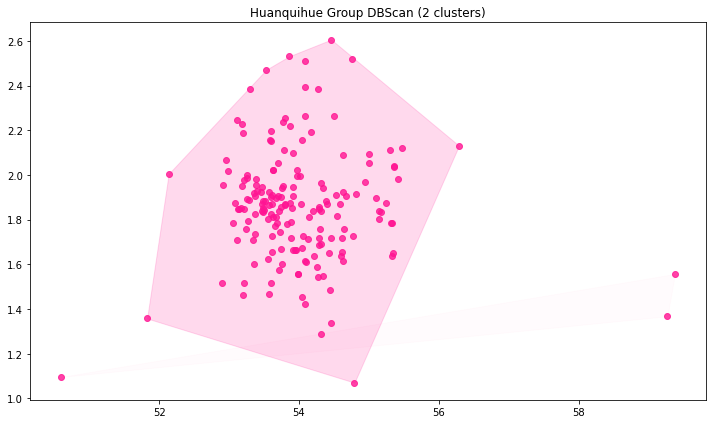

N points:  742
42.549520280433626
0.2879727401503942


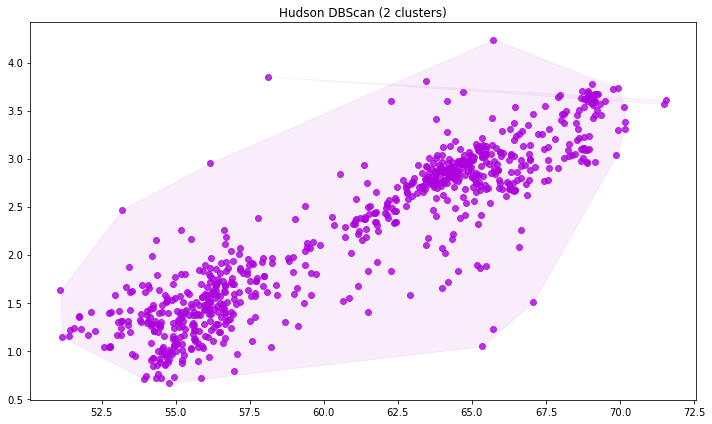

N points:  11
0.037317200546169715
0.9471463694824536


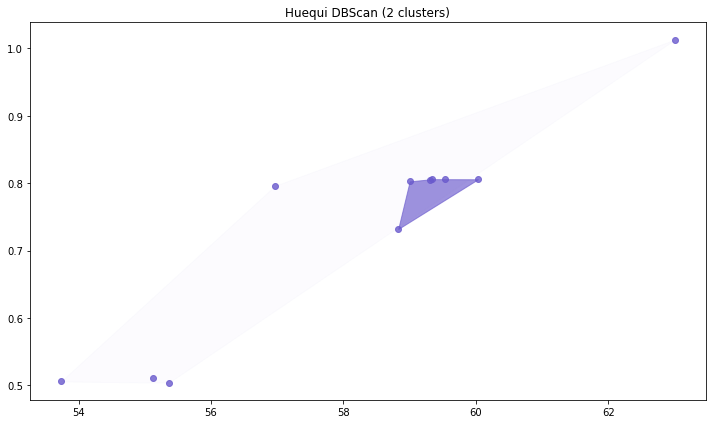

N points:  81
3.9363922097825252
0.6924596826182778
0.22959661465102954
0.2532604914823935


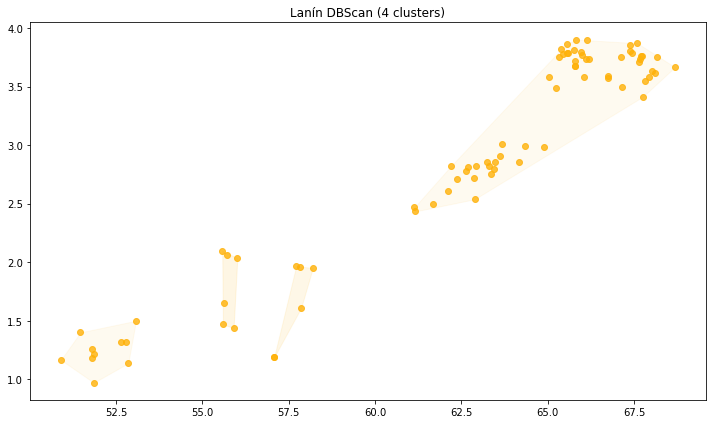

N points:  38
1.4680835888868842
0.24837260614998513
1.0329620237430106


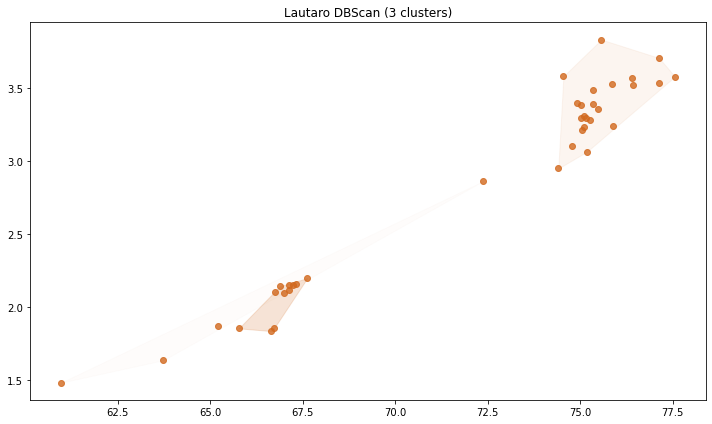

N points:  1412
30.21611894482419


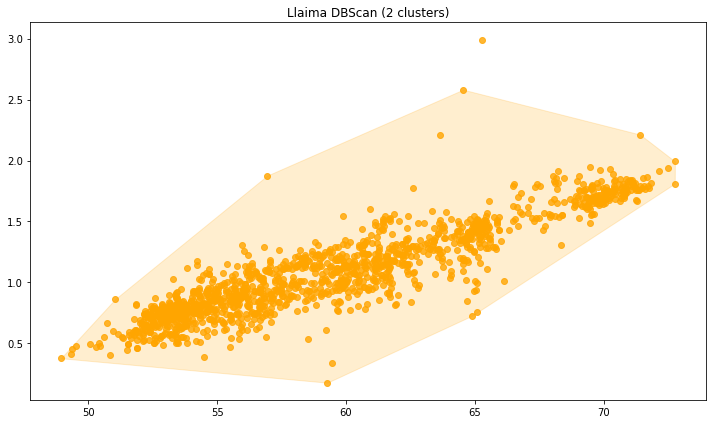

N points:  15
0.06170701373563503
4.276008102407815


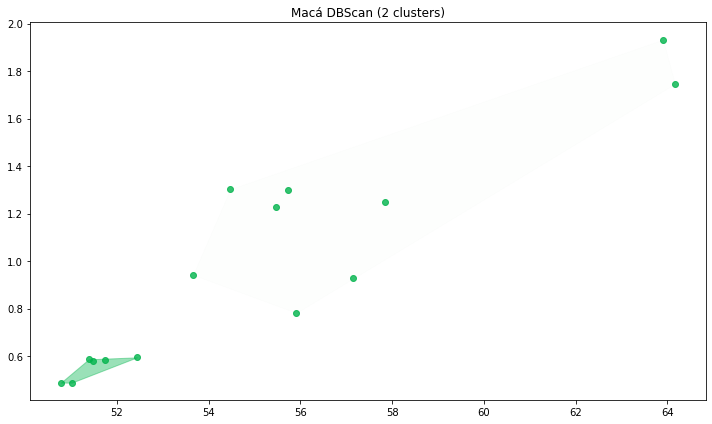

N points:  346
1.1571482818342247
2.454974181453281
4.09409373395664
11.290120027239368


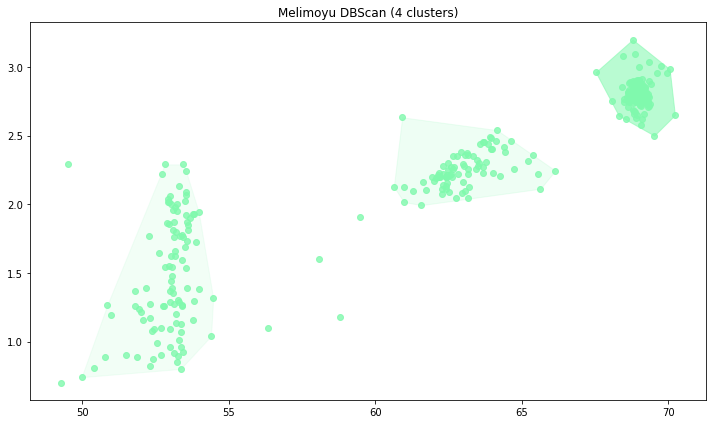

N points:  51
0.1772101208585326
1.614188705233488
1.0372104746103332
0.09619053243056896
0.13519999999999754
7.614216080253442


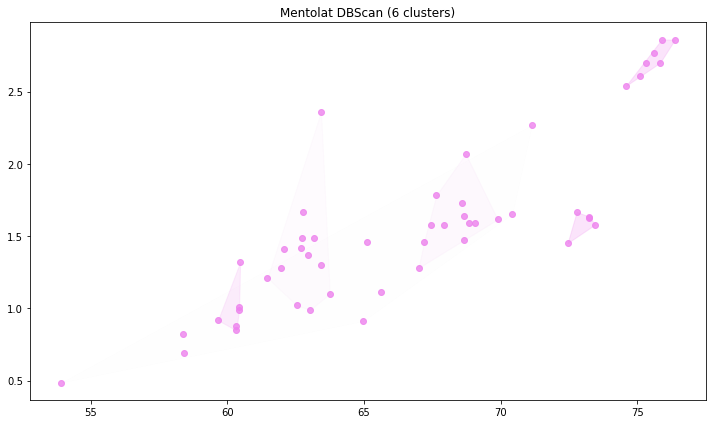

N points:  369
33.101420075791566
60.657929053051134


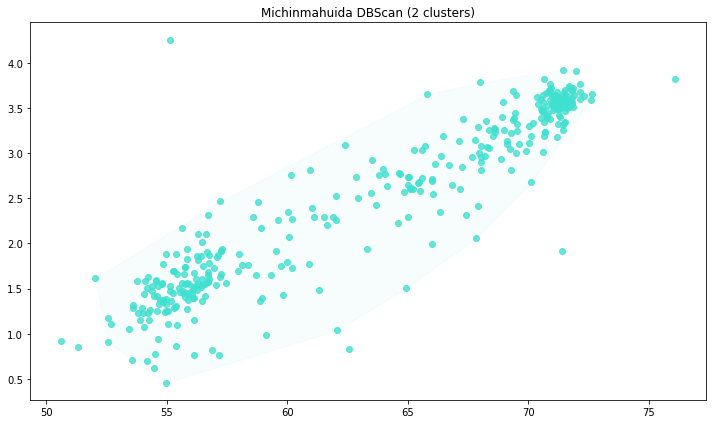

N points:  2659
32.13713155279413


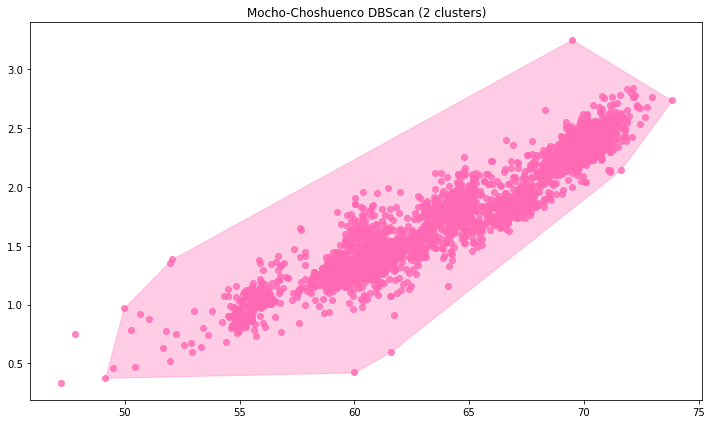

N points:  370
10.60896475541449
18.371962648300837


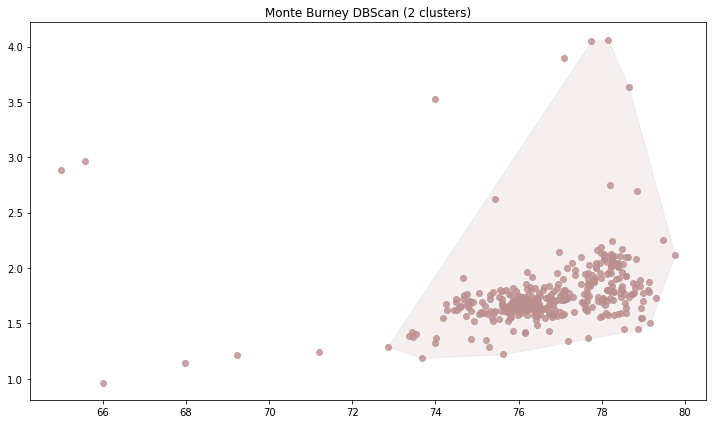

N points:  96
3.1474673262130466
2.2564247898821463


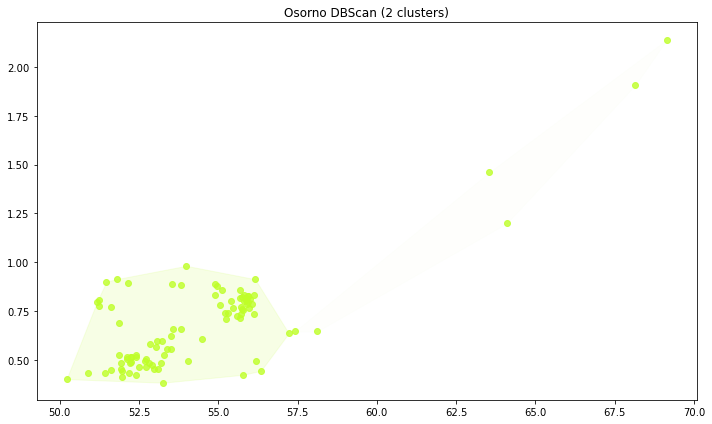

N points:  1573
15.014858914174965
0.8861672347215404
27.935424905233134


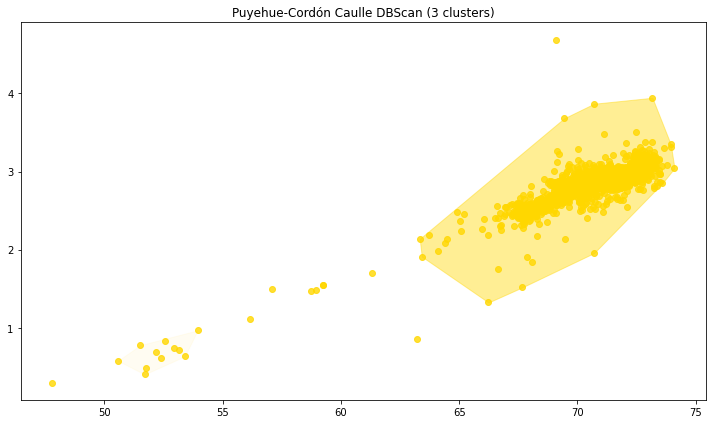

N points:  1205
11.33860471904677
1.5962398899391133
0.15987665715726962
13.220017240868174


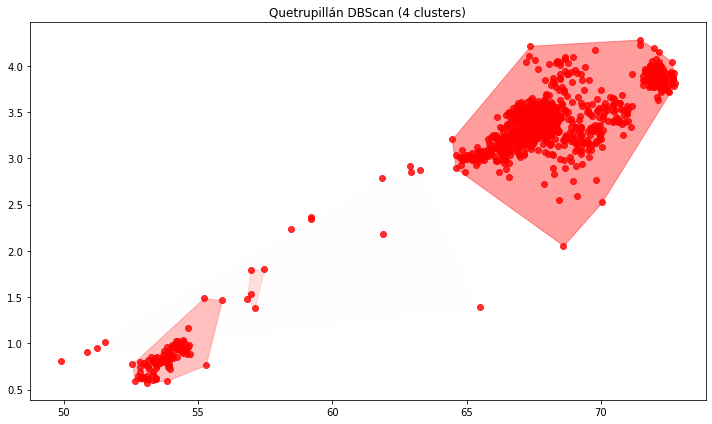

N points:  132
2.810941509785721
0.7583579819525426


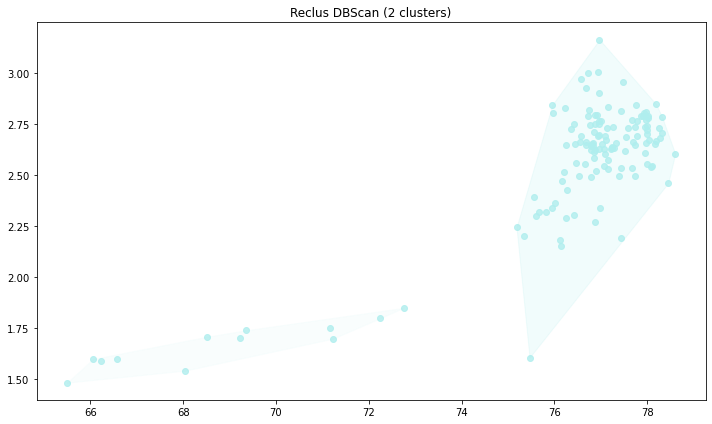

N points:  70
0.7835930098408426
3.5297844038064454


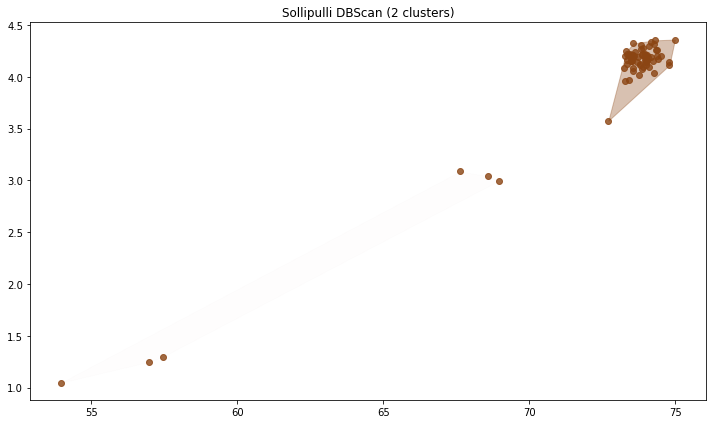

N points:  21
3.804769361008084


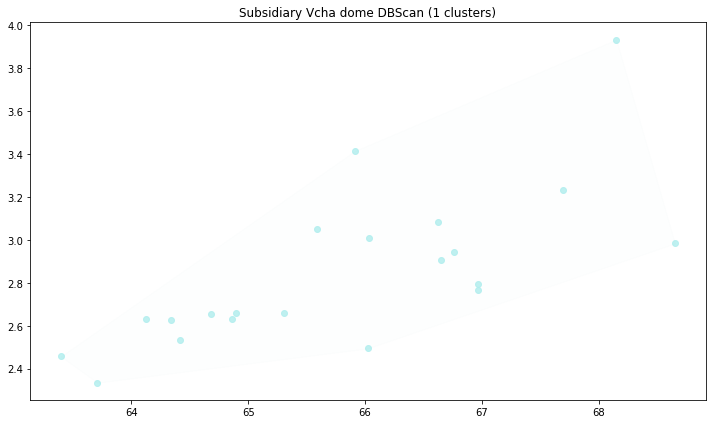

N points:  859
8.285994510973694
0.04875679081834505


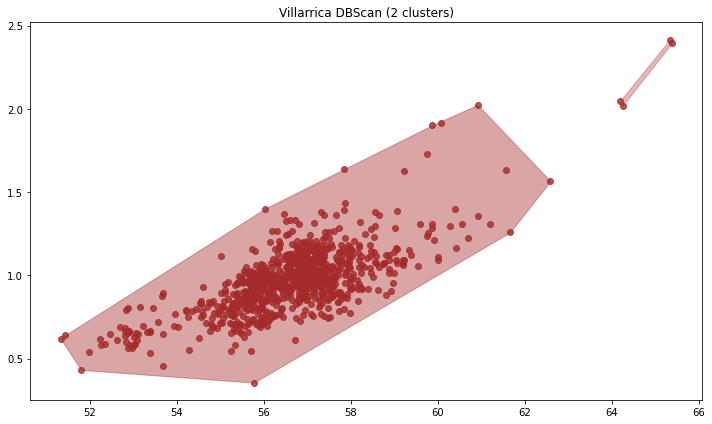

N points:  2


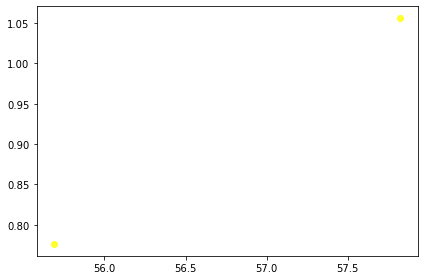

N points:  37
1.184877013382902
0.020294725690746418
1.308077175726794
9.050919599747601


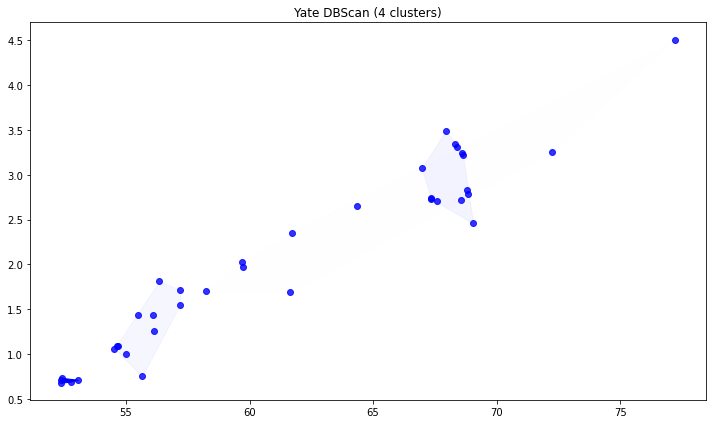

In [57]:
for v in all_volcanoes:
    points = sh.get_points_per_volcano(v, 'SiO2','K2O')
    n_clus = n_clusters[v]
    color = get_volcano_color(v)
    print('N points: ', len(points))
    if len(points) < 5:
        plt.scatter(points[:,0], points[:,1], color=color, alpha=.8)
        if len(points) > 2:
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

        # DBSCAN
        clusters = sh.get_clusters_dbscan(points, eps=1, algorithm='auto')
        title = v + ' DBScan (' + str(len(clusters.keys())) + ' clusters)'
        plt.title(title)
        for c_label, c_points in clusters.items():
            plt.scatter(c_points[:,0], c_points[:,1], color=color, alpha=.8)
            if len(c_points) > 2:
                hull = ConvexHull(c_points)

                vertexs = []
                for simplex in hull.vertices:
                    vertexs.append([c_points[simplex, 0], c_points[simplex, 1]])
                
#                 dens = np.float32(m(len(c_points)))
                # consider polygon area
                area = PolyArea(list(list(zip(*vertexs))[0]), list(list(zip(*vertexs))[1]))
                print(area)
                dens = np.float32(mLA(len(c_points)/area))

                patches = []
                r = vertexs
                polygon = Polygon(vertexs, True)
                patches.append(polygon)
                p = PatchCollection(patches, alpha=dens)
                p.set_color(color)
                axes.add_collection(p)
                
        
                    
    saveTitle = v + '.png'
    plt.savefig(saveTitle, transparent='True')
    
    plt.tight_layout()
    plt.show()


In [58]:
# fill polygon : https://blog.csdn.net/qq_37025073/article/details/106821092

In [59]:
# Polygon fill type :
# https://blog.csdn.net/weixin_32252271/article/details/118900402?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-118900402-blog-106821092.pc_relevant_default&spm=1001.2101.3001.4242.2&utm_relevant_index=4